In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io as io
import numpy as np
import pandas as pd

from hydrophone_data_processing import load

In [2]:
spectra = io.loadmat('BA1B_bubble_spectra.mat')

In [3]:
bubbles = pd.read_csv('allbubblesh1.csv', names=np.arange(2114))


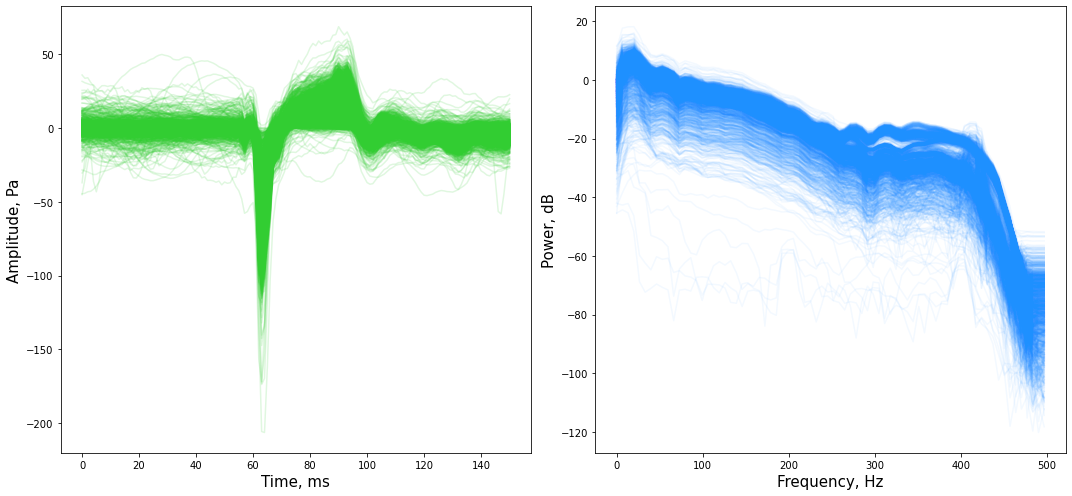

In [4]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax.plot(bubbles.values, color='limegreen', alpha=0.15)
ax.set_ylabel('Amplitude, Pa', fontsize=15)
ax.set_xlabel('Time, ms', fontsize=15)

ax2.plot(spectra['f'], 10*np.log10(spectra['PXX']), color='dodgerblue', alpha=0.05)
ax2.set_ylabel('Power, dB', fontsize=15)
ax2.set_xlabel('Frequency, Hz', fontsize=15)
fig.tight_layout()

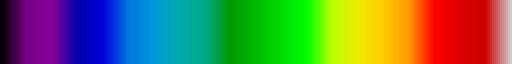

In [106]:
plt.cm.nipy_spectral

In [5]:
# spectra['PXX'].shape

In [6]:
# spectra['f'].flatten()[spectra['f'].flatten() > 260]

In [7]:
# spectra['f'].flatten()[40:]

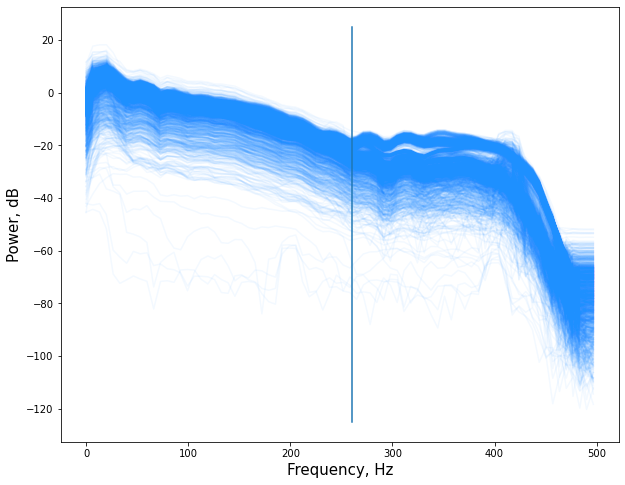

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(spectra['f'], 10*np.log10(spectra['PXX']), color='dodgerblue', alpha=0.05)
ax.set_ylabel('Power, dB', fontsize=15)
ax.set_xlabel('Frequency, Hz', fontsize=15)

ax.plot([260, 260], [-125, 25])

In [9]:
# spectra['PXX'][:,0][38:-7]

In [10]:
# spectra['f'].flatten()[38:-7]

Text(0.5, 0, 'frequency, Hz')

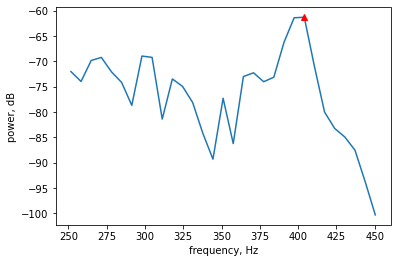

In [11]:
x = spectra['f'].flatten()[38:-7]
y = 10*np.log10(spectra['PXX'][:,1][38:-7])

plt.plot(x, y)

ypeak = np.argmax(y)
xpeak = x[ypeak]

plt.plot(xpeak, y.max(), marker='^', color='red')
plt.ylabel('power, dB')
plt.xlabel('frequency, Hz')

In [12]:
# fig, ax = plt.subplots(figsize=(10, 8))
# ax.set_ylabel('power, dB')
# ax.set_xlabel('frequency, Hz')
# x = spectra['f'].flatten()[38:-7]

# peaks = []

# for p in spectra['PXX'].transpose():
#     y = 10*np.log10(p[38:-7])
    
#     ax.plot(x, y, color='dodgerblue', alpha=0.15)
    
#     ypeak = np.argmax(y)
#     xpeak = x[ypeak]
#     peaks.append(xpeak)
    
#     ax.plot(xpeak, y.max(), marker='^', color='red')
    
# fig, ax = plt.subplots()

# ax.hist(peaks, bins=20)

(array([670., 118.,  18.,  46.,  21.,  17.,  22., 463., 280.,  34.,   7.,
         45., 154.,  52.,   5.,   3.,   5.,   4.,   4., 146.]),
 array([251.65562914, 259.93377483, 268.21192053, 276.49006623,
        284.76821192, 293.04635762, 301.32450331, 309.60264901,
        317.8807947 , 326.1589404 , 334.43708609, 342.71523179,
        350.99337748, 359.27152318, 367.54966887, 375.82781457,
        384.10596026, 392.38410596, 400.66225166, 408.94039735,
        417.21854305]),
 <BarContainer object of 20 artists>)

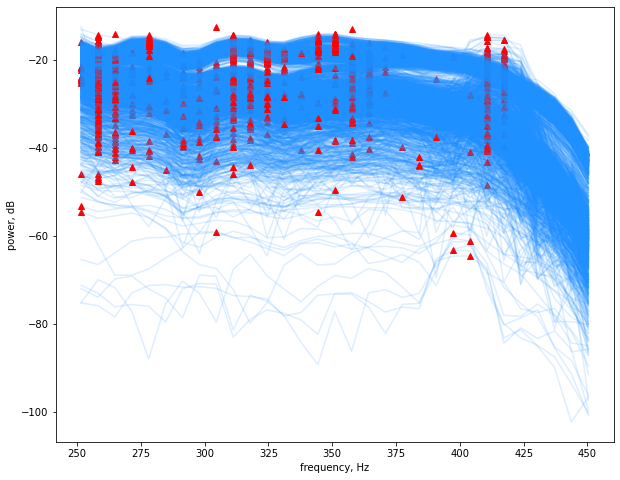

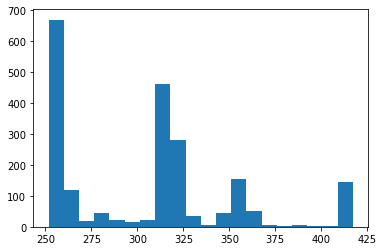

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel('power, dB')
ax.set_xlabel('frequency, Hz')
x = spectra['f'].flatten()[38:-7]

peaks = []

for p in spectra['PXX'].transpose():
    y = 10*np.log10(p[38:-7])
    
    ax.plot(x, y, color='dodgerblue', alpha=0.15)
    
    ypeak = np.argmax(y)
    xpeak = x[ypeak]
    
    if ypeak == 0:
        ypeak = np.argmax(y[8:])
        xpeak = x[ypeak]
    
    peaks.append(xpeak)
    
    ax.plot(xpeak, y.max(), marker='^', color='red')
    
fig, ax = plt.subplots()

ax.hist(peaks, bins=20)

In [14]:
# def minnaert_radius(freq):
#     # gamma = np.mean([1.3, 1.67]) # dimensionless
#     # https://www.engineeringtoolbox.com/specific-heat-capacity-gases-d_159.html
#     gamma = 1.405 # taken from website above for 300K
#     # PA = 2.5 # bar, 100 kPa, N/m^2, kg*m/s^2m^2 = 100000 kg*m/(s^2 m^2) = 100000 kg/(m*s^2)
#     # rho = 1 # density of water, 997 kg/m^3
#     PA = 2.5 * 100000 # kg/(m*s^2)
#     rho = 997 # kg/m^3
#     # PA/rho => PA(kg*m^-1*s^-2) / rho(kg * m^-3) =? PA(...) * rho(kg^-1 * m^3) => m^2 * s^-2
#     return (2 * np.pi * freq)**(-1) * ((3 * gamma * PA)/(rho))**(1/2)

In [66]:
def minnaert_radius(freq, depth):
    # gamma = np.mean([1.3, 1.67]) # dimensionless
    # https://www.engineeringtoolbox.com/specific-heat-capacity-gases-d_159.html
    gamma = 1.405 # taken from website above for 300K
    # PA = 2.5 # bar, 100 kPa, N/m^2, kg*m/s^2m^2 = 100000 kg*m/(s^2 m^2) = 100000 kg/(m*s^2)
    # rho = 1 # density of water, 997 kg/m^3
    # PA = 2.5 * 100000 # kg/(m*s^2)
    rho = 997 # kg/m^3
    PA = (rho * 9.8 * depth) + 100000 # kg/(m*s^2)
    # PA/rho => PA(kg*m^-1*s^-2) / rho(kg * m^-3) =? PA(...) * rho(kg^-1 * m^3) => m^2 * s^-2
    return (2 * np.pi * freq)**(-1) * ((3 * gamma * PA)/(rho))**(1/2)

In [65]:
# def get_pressure(height):
#     rho = 997 # kg/m^3
#     g = 9.81 # m/s^2
#     return (rho * g * height) + 100000

# freq = 397.350993
# rho = 997
# (2*np.pi*freq)**(-1)*((3 * 1.405 * get_pressure(height=7.5))/rho)**(1/2)

0.010843371003268917

In [71]:
detectfiles = '/media/sda/data/borehole/detections/*.csv'
bubbles = load.import_detections(detectfiles)
bubbles = bubbles[bubbles.similarity>0.90]
bubbles.set_index('time', inplace=True)

In [72]:
bubbles.head()

,similarity,template_id
time,,
2019-05-02 12:08:43.894999+00:00,0.906010,0
2019-05-05 19:34:37.970000+00:00,0.923814,0
2019-05-10 03:31:44.294000+00:00,0.918499,0
2019-05-18 11:45:45.948000+00:00,0.946315,0
2019-05-18 11:47:16.325000+00:00,0.967347,0


In [73]:
bubbles['resonant_freq'] = peaks

In [74]:
bubbles['radius_min'] = bubbles.resonant_freq.apply(lambda f: minnaert_radius(f, 0))

In [75]:
bubbles['radius_max'] = bubbles.resonant_freq.apply(lambda f: minnaert_radius(f, 15))

In [77]:
volume = lambda r: 4/3 * np.pi * r**3
bubbles['volume_min'] = bubbles.radius_min.apply(volume)
bubbles['volume_max'] = bubbles.radius_max.apply(volume)

Text(0, 0.5, 'Bubble Count')

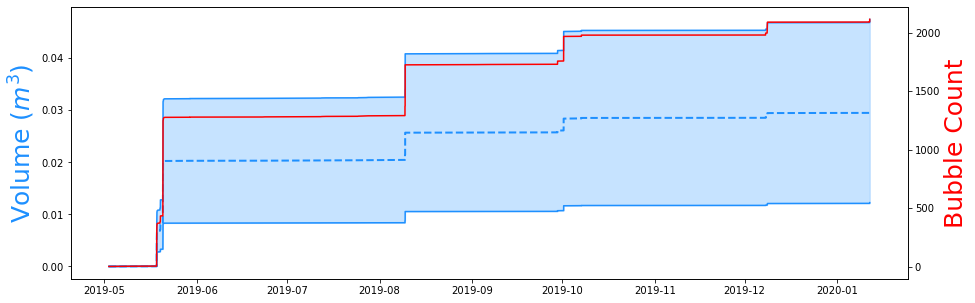

In [95]:
fig, ax = plt.subplots(figsize=(15, 5))
vols_min = bubbles.volume_min.cumsum()
vols_max = bubbles.volume_max.cumsum()
x = bubbles.index
cnt = np.ones_like(x).cumsum()

# ax.plot(x, vols, color='dodgerblue', linewidth=5)
ax.plot(x, vols_min, color='dodgerblue')
ax.plot(x, vols_max, color='dodgerblue')
ax.plot(x, (vols_min + vols_max)/2, color='dodgerblue', linestyle='--', linewidth=2)
ax.fill_between(x=x, y1=vols_min, y2=vols_max, color='dodgerblue', alpha=0.25)
ax.set_ylabel('Volume $(m^3)$', fontsize=25, color='dodgerblue')

ax2 = ax.twinx()
ax2.plot(x, cnt, color='red')
ax2.set_ylabel('Bubble Count', fontsize=25, color='red')

In [98]:
def ideal_gas_n(pressure, volume):
    P = pressure
    V = volume
    R = 8.31446261815324 # J K^−1 mol^−1
    T = 34.75 + 273.15 # K
    n = (P * V)/(R * T)
    return n

In [100]:
print('minimum H2 moles produced:', ideal_gas_n(pressure=100000, volume=vols_min.iloc[-1]))
print('maximum H2 moles produced:', ideal_gas_n(pressure=(997 * 9.8 * 15) + 100000, volume=vols_max.iloc[-1]))

minimum H2 moles produced: 0.478748217693
maximum H2 moles produced: 4.56992760347


In [103]:
Fe3plus = 55.845
O3 = 3* 15.999
((Fe3plus + O3) * 4.56992760347)

7.8802793457245395e-25

Text(0.5, 0, 'Time, ms')

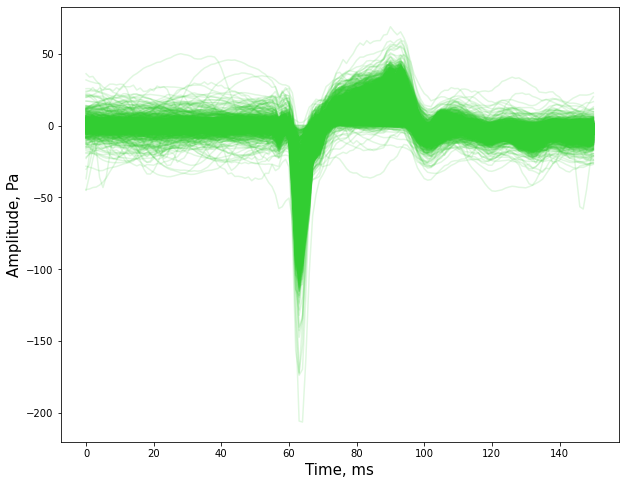

In [33]:
# fig, ax = plt.subplots(figsize=(10, 8))
# ax.plot(bubbles.values, color='limegreen', alpha=0.15)
# ax.set_ylabel('Amplitude, Pa', fontsize=15)
# ax.set_xlabel('Time, ms', fontsize=15)

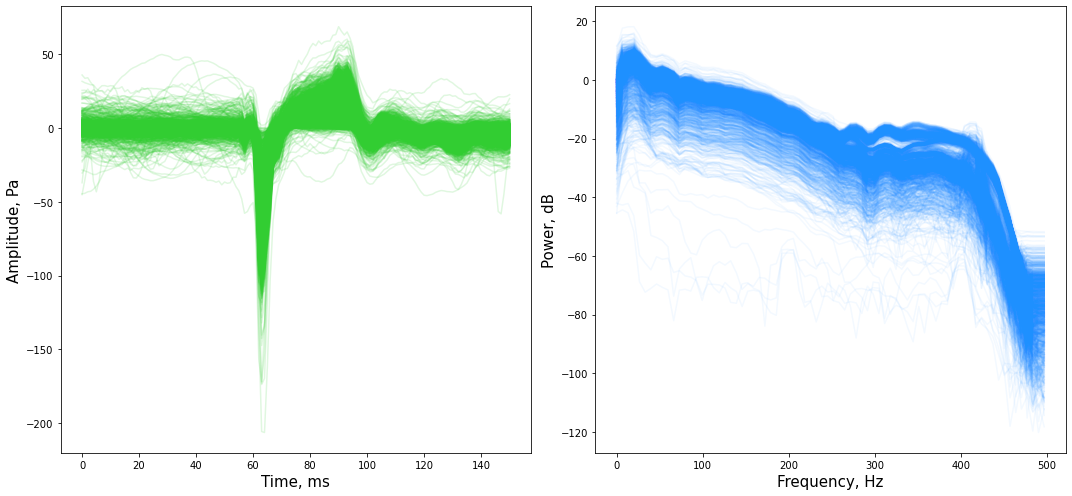

In [ ]:
def minnaert_radius(freq):
    # gamma = np.mean([1.3, 1.67]) # dimensionless
    # https://www.engineeringtoolbox.com/specific-heat-capacity-gases-d_159.html
    gamma = 1.405 # taken from website above for 300K
    # PA = 2.5 # bar, 100 kPa, N/m^2, kg*m/s^2m^2 = 100000 kg*m/(s^2 m^2) = 100000 kg/(m*s^2)
    # rho = 1 # density of water, 997 kg/m^3
    PA = 2.5 * 100000 # kg/(m*s^2)
    rho = 997 # kg/m^3
    # PA/rho => PA(kg*m^-1*s^-2) / rho(kg * m^-3) =? PA(...) * rho(kg^-1 * m^3) => m^2 * s^-2
    return (2 * np.pi * freq)**(-1) * ((3 * gamma * PA)/(rho))**(1/2)